# Pendulum Vector Fields

In [6]:
import createpilabels as labels
import pendulum

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
L_1: float = 1
theta_0_1: float = np.pi/3
omega_0_1: float = 0
mu_1: float = 0.5
G: float = 9.8

In [22]:
p = pendulum.Pendulum(L=1, theta_0=np.pi/3, omega_0=0, mu=0.5)
p.update_theta(T=100, step=0.01)

trace_path = p.get_trace_path()

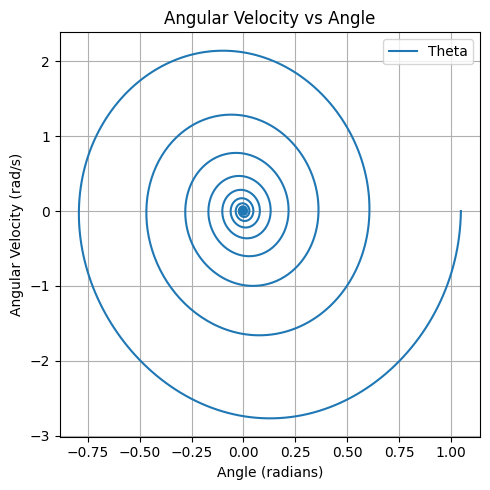

In [23]:
plt.figure(figsize=(5, 5))
plt.plot(trace_path[:, 0], trace_path[:, 1], label='Theta')
plt.title('Angular Velocity vs Angle')
plt.xlabel('Angle (radians)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
X, Y = np.meshgrid(np.arange(-np.pi / 4, np.pi / 2, .2), np.arange(-5, 5, .2))

U = Y
V = (-mu_1 * Y) - ((G/L_1) * np.sin(X))

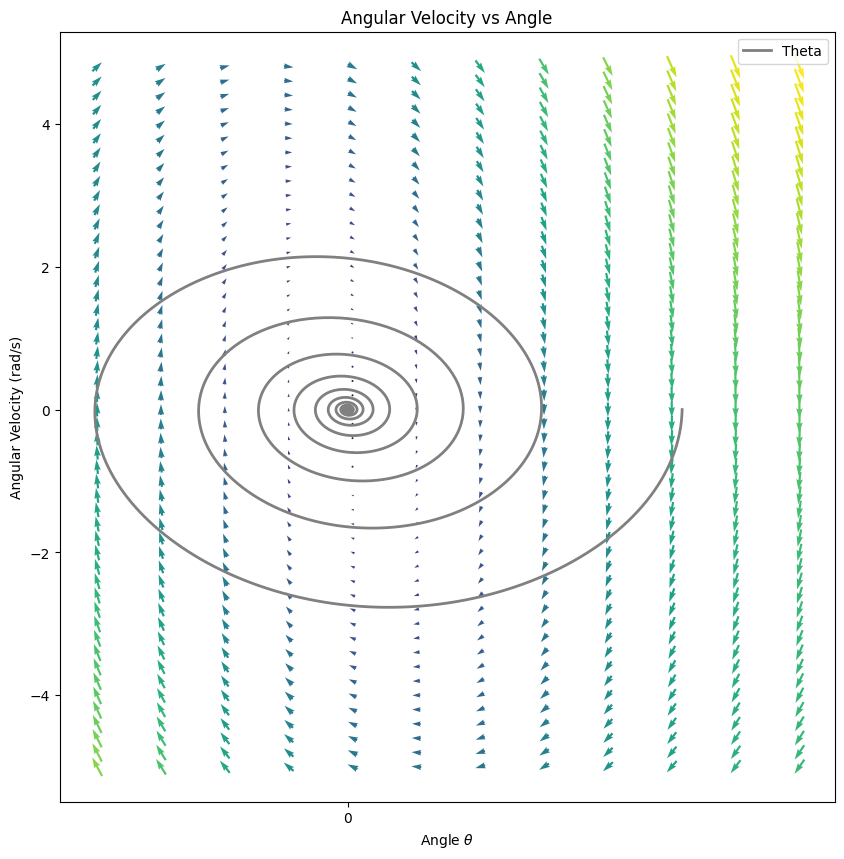

In [25]:
fig, ax = plt.subplots(ncols=1, figsize=(10,10))

ax.set_xlabel(r"Angle $\theta$")
ax.set_ylabel('Angular Velocity (rad/s)')
labels.create_pi_labels(-2, 2, 1/2, ax, 'x')

ax.set_title('Angular Velocity vs Angle')
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M, units='xy', pivot='mid', width=0.022,
               scale=50, cmap = 'viridis')

ax.plot(trace_path[:, 0], trace_path[:, 1], label='Theta', color='grey', linewidth=2)
ax.legend()

In [ ]:
length: float = 1
damping_factor: float = 0.5
initial_angles = [0, np.pi / 4, np.pi / 3, np.pi / 2]
initial_angular_velocities = [0, np.pi / 4, 2 * np.pi]

parameter_combinations = product(initial_angles, initial_angular_velocities)
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

C:\Users\edwar\AppData\Local\Temp\ipykernel_58260\2612750341.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


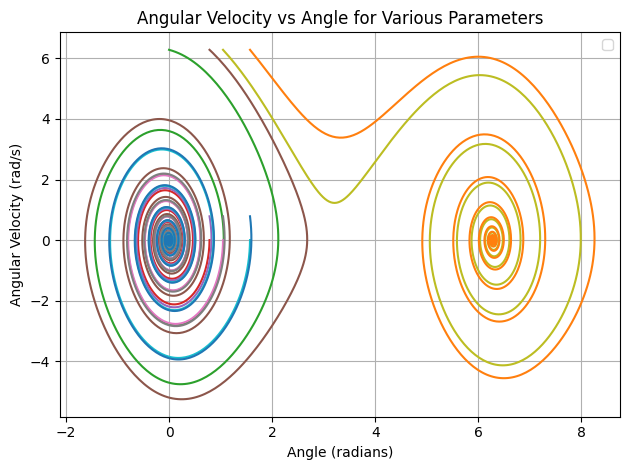

In [40]:
for theta_0, omega_0 in parameter_combinations:
    # Create a pendulum with the current parameter set
    p = pendulum.Pendulum(L=length, theta_0=theta_0, omega_0=omega_0, mu=damping_factor)
    p.update_theta(T=100, step=0.01)

    # Get the trace path
    trace_path = p.get_trace_path()

    # Plot the results on the same figure
    plt.plot(trace_path[:, 0], trace_path[:, 1])

# Add labels, title, and legend
plt.title('Angular Velocity vs Angle for Various Parameters')
plt.xlabel('Angle (radians)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid(True)
plt.legend()

# Show the combined plot
plt.tight_layout()
plt.show()